In [51]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib

plt = matplotlib.pyplot

%matplotlib inline
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

warnings.filterwarnings('ignore')

In [52]:
match = pd.read_csv('./Dataset/matches.csv')

### Exploratory Analysis and Visualizations

#### The most successful IPL team

Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

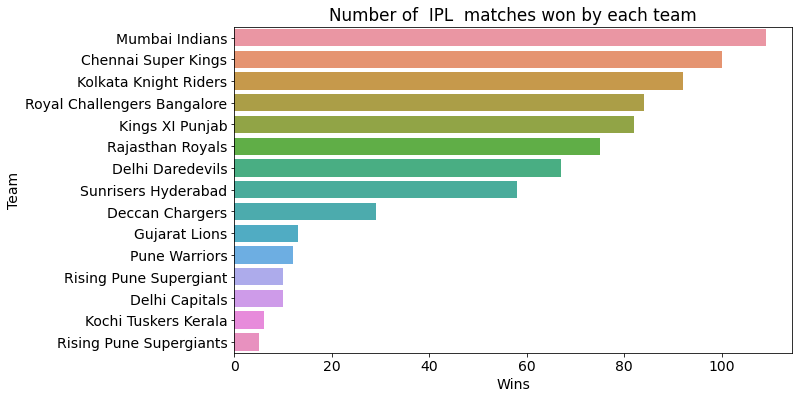

In [53]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = match,order= match['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

**Observations:**<br>

Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -109) followed by Chennai Super Kings and Kolkata Knight Riders.

#### Total number of matches played in a different stadiums

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

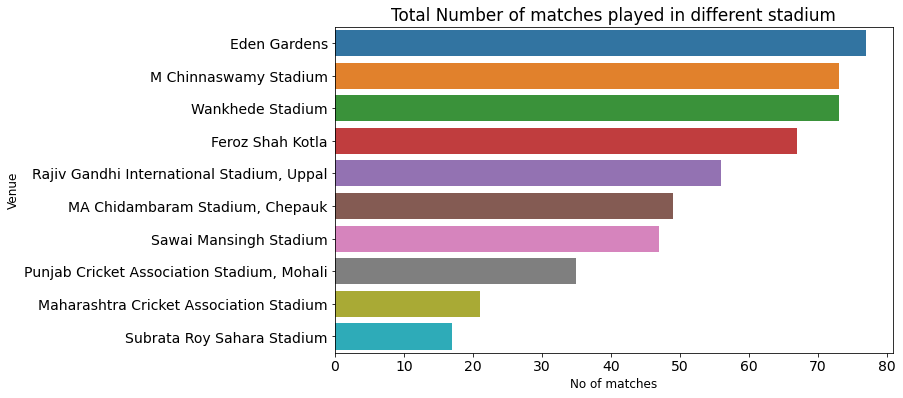

In [54]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'venue',data = match,order = match['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

**Observation:**<br>

Eden Gardens has hosted the maximum number of IPL matches followed by Wankhede Stadium and M Chinnaswamy Stadium.

#### The team that won the most number of toss

In [55]:
toss_ser = match['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True)
toss_df

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


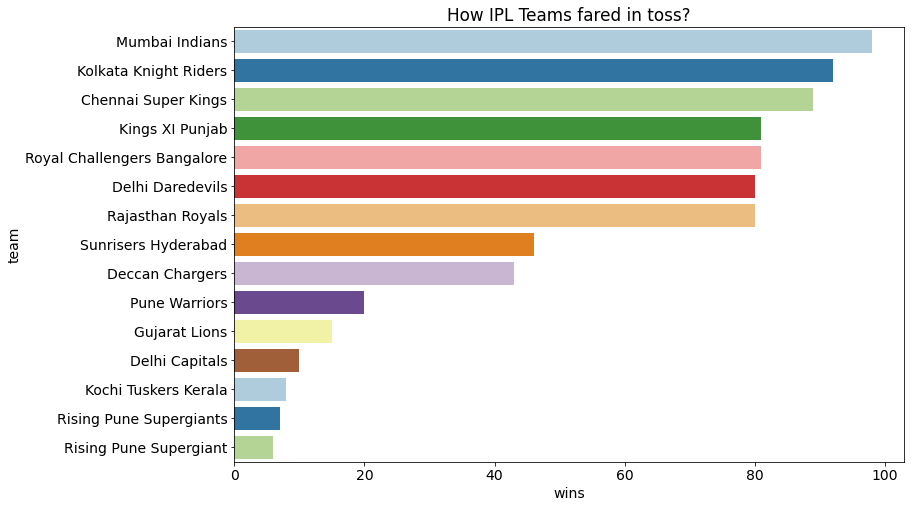

In [56]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

**Observations:**<br>
Mumbai Indians has won the most toss(till 2019) in IPL history.<br>
All the top teams in IPL are successful in winning the toss as well.

In [57]:
mvp_ser = match['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1
mvp_ten_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,DA Warner,17
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,AM Rahane,12


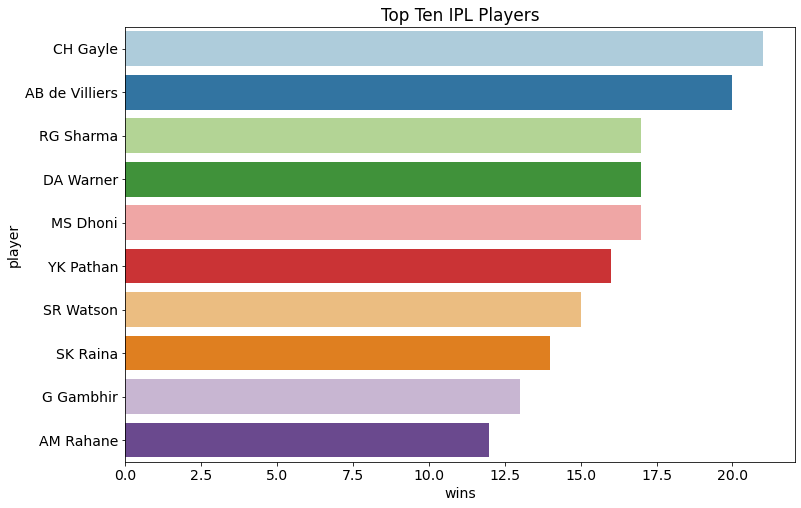

In [58]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

**Observations:**<br>
Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player. <br>
Six Indian players have figured in the top ten IPL players list.

**Q: Does the presence of the most valuable players in a team ensures the IPL trophy?** <br><br>

We have figured out the top ten players of IPL using the ‘Player of the Match’ title as the yardstick. It is interesting to note that <b>the top two players — Chris Gayle and AB de Villers have never won an IPL.</b> Of the top ten players, <b>6 players(RG Sharma, MS Dhoni, DA Warner, SR Watson, SK Raina, and G Gambhir) have won the IPL.<b> It exemplifies the importance of the presence of the most valuable player(s) in a team.



#### The team with the most number of wins per season.

In [63]:
teamWins = pd.read_csv('./Dataset/matches.csv')

In [64]:
teamWins['Season'] = teamWins['Season'].apply(lambda x: x.split('-')[1])
teamWins['Season'] = teamWins['Season'].astype(int)
teams_per_season = teamWins.groupby('Season')['winner'].value_counts()
teams_per_season

Season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [65]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['Year', 'Team', 'Wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'Year': [items[0][0]],
            'Team': [items[0][1]],
            'Wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [66]:
win_per_season_df

,Year,Team,Wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


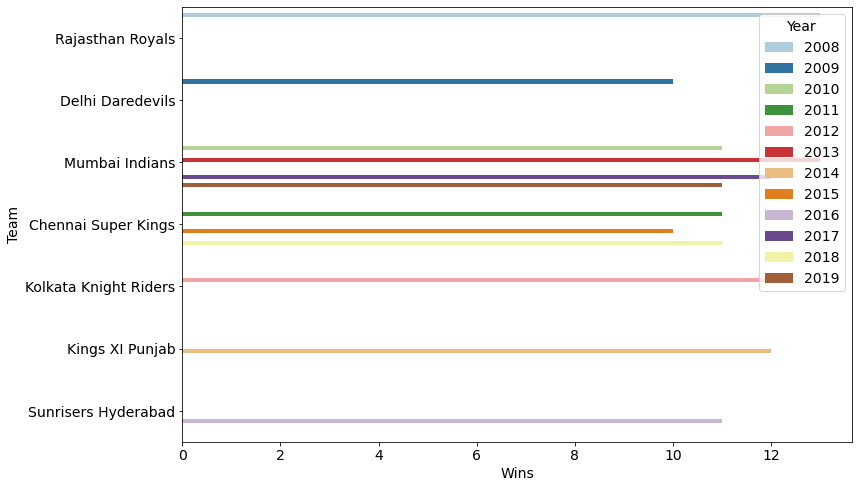

In [67]:
sns.barplot('Wins', 'Team', hue='Year', data=win_per_season_df, palette='Paired');

#### Umpires who have officiated the most number of IPL matches on-field

In [69]:
umpire1_ser = match['umpire1'].value_counts()
umpire2_ser = match['umpire2'].value_counts()
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
KN Anantapadmanabhan,NaN,3.0
K Srinivasan,NaN,3.0
SD Ranade,NaN,2.0
Nand Kishore,NaN,1.0


In [74]:
umpire_ser = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df4, ignore_index=True) 
umpire_df = umpire_df.sort_values('matches', ascending=False)
umpire_df.head()

,umpire,matches
2,S Ravi,106.0
0,HDPK Dharmasena,87.0
12,C Shamshuddin,73.0
3,AK Chaudhary,58.0
55,SJA Taufel,55.0


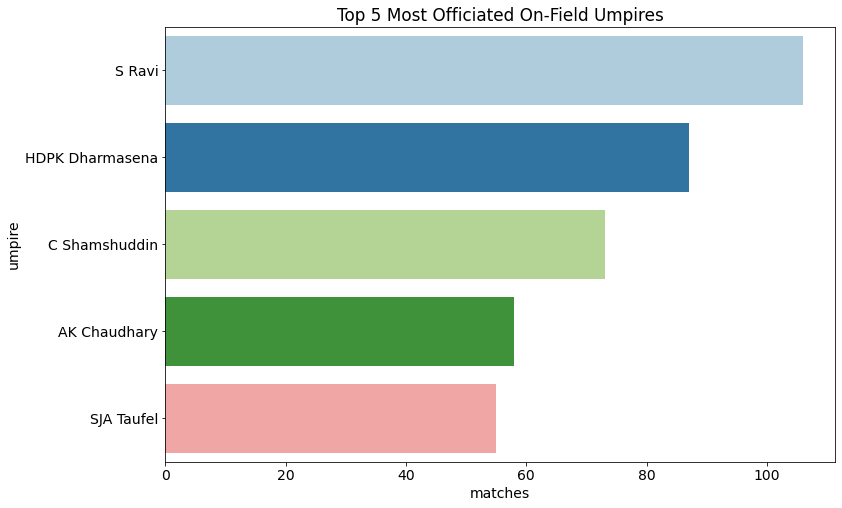

In [77]:
plt.title("Top 5 Most Officiated On-Field Umpires")
sns.barplot(x='matches', y='umpire', data=umpire_df.head(), palette='Paired');

**Observations:**<br>

S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field, followed by former Sri Lankan international cricketer HDPK Dharmasena have officiated most number of IPL matches on-field.

#### Impact on winning the toss

In [83]:
win_count = 0
for index, value in match.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(match)
print('The percentage of winning if won the toss:', round(prob * 100), "%")    

The number of times the team winning toss have won: 393
The percentage of winning if won the toss: 52 %


**Observation:<br>**

<b>The probability of winning when the team had won the toss is 52%.</b> So winning toss gives a slight edge over the opponent. However, it would be naive to term winning the toss as a greater advantage as there were 363 instances when the team losing the toss has won the game.

#### Is it better to defend or chase in IPL?

In [85]:
defend_vict_ser = match['win_by_runs'].value_counts()
defend_vict_ser.sort_values(ascending=True)

146      1
105      1
87       1
42       1
93       1
      ... 
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

Of the 756 IPL matches played from 2008 to 2019, 419 matches were won chasing the target. <b>Hence, more victories were registered by teams chasing a total(batting second) than defending the total.</b>

When defending a total, the biggest victory was by 146 runs.<br>
<b>Match Details :

In [86]:
score = 146
for index, row in match.iterrows():
    if(row['win_by_runs'] == score):
        print(row)  

id                               44
Season                         2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object


**Observation : <br>**

The greatest victory in IPL on defending a total is for Mumbai Indians when they defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi.